# A3-Q5: Time of Death

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## (a) Dynamics Function

In [87]:
# Dynamics function
# === YOUR CODE HERE ===
def ta(t):
    if (t%24 < 7):
        return 15
    elif (t%24 < 7.5):
        return 15+7*((t%24-7)/0.5)
    elif (t%24 < 18):
        return 22
    elif (t%24 < 20):
        return 22-7*((t%24-18)/2)
    else:
        return 15
def dTdt_T(t,T,a,b):
    result = -0.15*(T-ta(t))+(a+2*b)/100
    return result
def dAdt_T(T,a):
    result = 0
    if (T >= 29 and T <= 45):
        result = 0.0015*np.square(T-29)*(1-np.exp([0.08*(T-45)])[0])*a*(30-a)
    return result
def dBdt_T(T,b):
    result = 0
    if (T >= 13 and T <= 26):
        result = 0.002*np.square(T-13)*(1-np.exp([0.05*(T-26)])[0])*b*(20-b)
    return result

def dynamics(init_t,final_t):
    init_A = 1
    init_B = 1
    init_T = 37.5
    def dzdt(t, abt):
        a = abt[0]
        b = abt[1]
        T = abt[2]
        dadt = dAdt_T(T,a)
        dbdt = dBdt_T(T,b)
        dtdt = dTdt_T(t,T,a,b)
        return [dadt,dbdt,dtdt]
    def dAdt(t,abt):
        return dzdt(t,abt)[0]
    def dBdt(t,abt):
        return dzdt(t,abt)[1]
    def dTdt(t,abt):
        return dzdt(t,abt)[2]
    abt = np.array([init_A,init_B,init_T])
    
    final = solve_ivp(dzdt,[init_t,final_t],abt)
    return final
        

## (b) Run the simulation

In [103]:
# === YOUR CODE HERE ===
import pandas as pd
timeFound = 10.75
values = np.arange(-24,0,1)
data = []
for x in values:
    result = dynamics(x,timeFound)
    #print(result)
    A = result.y[0]
    B = result.y[1]
    T = result.y[2]
    data.append([x, A[len(A)-1], B[len(B)-1], T[len(T)-1]])
pd.DataFrame(data, columns=["time of death (in hours before midnight)","A when found","B when found","T when found"])

,time of death (in hours before midnight),A when found,B when found,T when found
0,-24,4.602313,19.999878,21.041972
1,-23,4.602313,19.999574,21.392161
2,-22,4.602313,19.995750,21.351807
3,-21,4.597317,19.996168,21.231813
4,-20,4.578118,19.966083,21.279549
5,-19,4.687205,19.741804,21.497693
6,-18,5.748296,19.741332,21.372585
7,-17,8.494992,19.887803,21.394274
8,-16,9.614631,19.880514,21.289023
9,-15,9.614631,19.709072,21.454614


Text(0.5, 0, 'time')

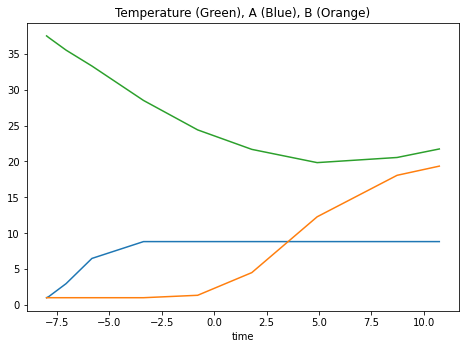

In [104]:
# Plot body temp, A, and B, and display the final state.

# === YOUR CODE HERE ===
y = dynamics(-8,timeFound)
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(y.t,y.y[0])
ax.plot(y.t,y.y[1])
ax.plot(y.t,y.y[2])
ax.set_title("Temperature (Green), A (Blue), B (Orange)")
ax.set_xlabel('time')

## (c) Prime Suspect

Double-click to answer here.<br>


In [101]:
I think he was killed at approximately 4pm (16:00) on oct 6, which makes Dennis Rillerson the prime suspect

SyntaxError: invalid syntax (<ipython-input-101-80c624032130>, line 1)